<a href="https://colab.research.google.com/github/habibumhd/Data-Science-Projects/blob/main/Data_Analysis_Online_Retail_(UCI_Machine_Learning_Repository).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Perilaku Pelanggan
1. Mengidentifikasi pelanggan setia berdasarkan jumlah dan frekuensi pembelian
2. Menganalisis produk yang paling sering dibeli oleh pelanggan
3. Mengevaluasi total belanja pelanggan dan distribusinya

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Baca Dataset Online retai dari UCI Machine Learning Repository
df = pd.read_excel('/content/sample_data/Online Retail.xlsx')

# Membuat kolom TotalPrice (Quantity * UnitPrice)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Mengidentifikasi pelanggan setia berdasarkan jumlah dan frekuensi pembelian
pelanggan_setia = df.groupby('CustomerID').agg({'InvoiceNo': 'nunique', 'TotalPrice': 'sum'}).reset_index()
pelanggan_setia = pelanggan_setia.sort_values(by=['InvoiceNo', 'TotalPrice'], ascending=False)

# Menammpilkan 10 pelanggan setia teratas
pelanggan_setia.head(10)


,CustomerID,InvoiceNo,TotalPrice
1895,14911.0,248,132572.62
330,12748.0,224,29072.10
4042,17841.0,169,40340.78
1674,14606.0,128,11713.85
2192,15311.0,118,59419.34
568,13089.0,118,57385.88
487,12971.0,89,10930.26
1615,14527.0,86,7711.38
803,13408.0,81,27487.41
1703,14646.0,77,279489.02


**Kesimpulan**

Pelanggan dengan CustomerID 14911 menunjukkan kesetiaan tertinggi dengan total 248 pembelian, yang mencapai total belanja sebesar 132,572.62. Pelanggan-pelanggan berikutnya dengan CustomerID 12748, 17841, 14606, dan lainnya juga menunjukkan tingkat kesetiaan yang tinggi dengan jumlah pembelian yang signifikan. Kemudian pelanggan dengan CustomerID 14646 memiliki total belanja tertinggi sebesar 279,489.02. Analisis pelanggan membantu perusahaan memahami perilaku dan preferensi pelanggan, yang dapat digunakan untuk meningkatkan pengalaman pelanggan dan hasil bisnis misalnya menyediakan penawaran khusus kepada pelanggan setia yang dapat meningkatkan loyalitas.

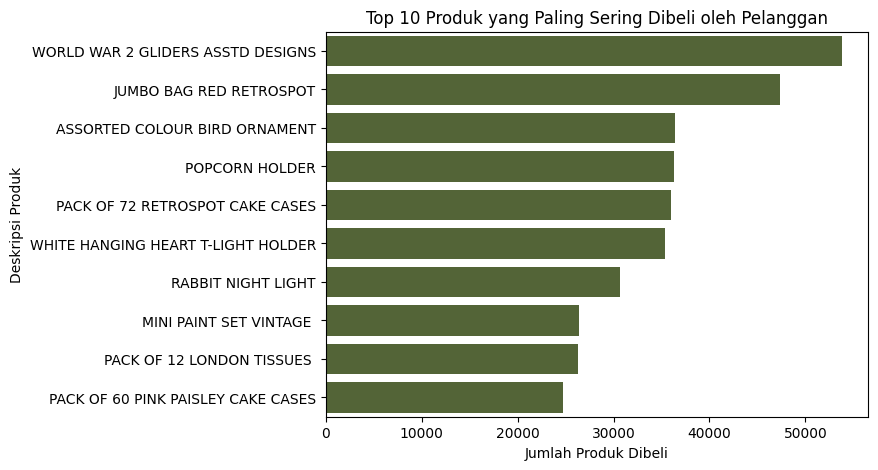

In [ ]:
# Menganalisis produk yang paling sering dibeli oleh pelanggan
produk_populer = df.groupby('Description')['Quantity'].sum().reset_index()
produk_populer = produk_populer.sort_values(by='Quantity', ascending=False)

# Menampilkan 10 produk teratas
plt.figure(figsize=(7, 5))
sns.barplot(x='Quantity', y='Description', data=produk_populer.head(10), color='darkolivegreen')
plt.title('Top 10 Produk yang Paling Sering Dibeli oleh Pelanggan')
plt.xlabel('Jumlah Produk Dibeli')
plt.ylabel('Deskripsi Produk')
plt.show()


Kesimpulan

Produk “WORLD WAR 2 GLIDERS ASSTD DESIGNS” adalah item yang paling sering dibeli oleh pelanggan, diikuti oleh “JUMBO BAG RED RETROSPORT” dan “ASSORTED COLOUR BIRD ORNAMENT”. Kesimpulan ini dapat membantu memahami preferensi pelanggan dan menyesuaikan strategi penjualan atau pemasaran.

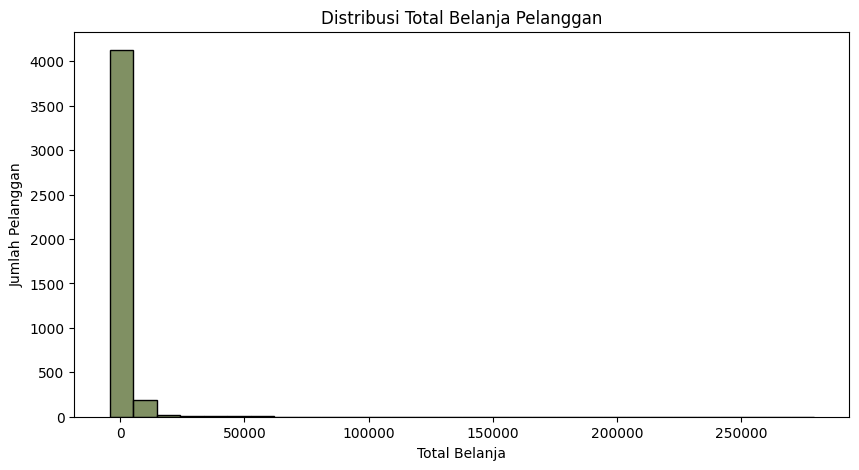

In [ ]:
# Mengevaluasi total belanja pelanggan dan distribusinya
plt.figure(figsize=(10, 5))
sns.histplot(pelanggan_setia['TotalPrice'], bins=30, kde=False, color='darkolivegreen')
plt.title('Distribusi Total Belanja Pelanggan')
plt.xlabel('Total Belanja')
plt.ylabel('Jumlah Pelanggan')
plt.show()


**Kesimpulan**

dapat disimpulkan bahwa sebagian besar pelanggan cenderung berbelanja dalam jumlah yang lebih kecil. Hanya ada sejumlah kecil pelanggan yang melakukan pembelian dalam jumlah yang besar.

# Analisis Geografi Penjualan


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Baca Dataset Online Retail dari UCI Machine Learning Repository
df = pd.read_excel('/content/sample_data/Online Retail.xlsx')

# Membuat kolom TotalPrice (Quantity * UnitPrice)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Menghapus baris dengan nilai 'TotalPrice' yang bukan numerik
df = df[pd.to_numeric(df['TotalPrice'], errors='coerce').notnull()]

# Analisis geografis berdasarkan negara
plt.figure(figsize=(15, 8))
sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index, color='darkolivegreen')
plt.title('Distribusi Penjualan Berdasarkan Negara')
plt.xlabel('Jumlah Pembelian')
plt.ylabel('Negara')
plt.show()


FileNotFoundError: ignored

**Kesimpulan**

Pada analisis geografi penjualan berdasarkan negara United Kingdom adalah negara dengan jumlah pembelian paling banyak

# Analisis Waktu Penjualan


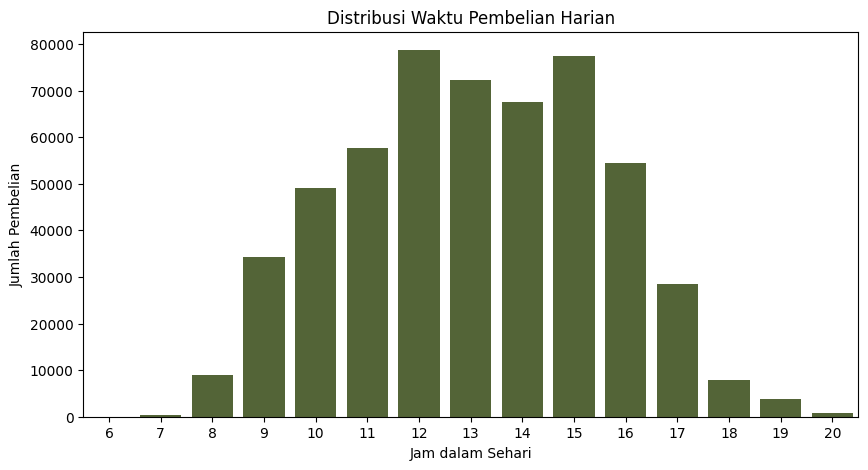

In [ ]:
# Mengekstrak jam dari kolom InvoiceDate
df['Hour'] = df['InvoiceDate'].dt.hour

# Mengelompokkan data berdasarkan jam untuk analisis waktu pembelian
pembelian_per_jam = df.groupby('Hour')['InvoiceNo'].count().reset_index()

# Plot distribusi waktu pembelian
plt.figure(figsize=(10, 5))
sns.barplot(x='Hour', y='InvoiceNo', data=pembelian_per_jam, color='darkolivegreen')
plt.title('Distribusi Waktu Pembelian Harian')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Pembelian')
plt.show()


**Kesimpulan**

Berdasarkan grafik batang, dapat disimpulkan bahwa penjualan tertinggi terjadi pada jam 12 dengan jumlah penjualan mencapai sekitar > 75.000 unit. Ini menunjukkan bahwa jam 12 adalah waktu puncak untuk aktivitas penjualan. Di sisi lain, penjualan terendah terjadi pada jam 7. Ini menunjukkan bahwa aktivitas penjualan cenderung lebih rendah pada jam-jam awal pagi hingga menjelang malam.